<a href="https://colab.research.google.com/github/sunshineluyao/design-principle-blockchain/blob/main/code/NLP_Blockchain_SoKs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/design-principle-blockchain/main/references/references.csv")
df

,Item type,Authors,Title,Journal,Publication year,Volume,Issue,Pages,Institution,Publisher,Book title,Proceedings title,Date published
0,Conference Paper,"Almashaqbeh G,Solomon R",SoK: privacy-preserving computing in the block...,NaN,2022,NaN,NaN,124-139,IEEE,NaN,NaN,2022 IEEE 7th European Symposium on Security a...,2022
1,Conference Paper,"Bonneau J,Miller A,Clark J,Narayanan A,Kroll J...",Sok: Research perspectives and challenges for ...,NaN,2015,NaN,NaN,104-121,IEEE,NaN,NaN,2015 IEEE symposium on security and privacy,2015
2,Journal Article,Wang G,SoK: Understanding BFT Consensus in the Age of...,Cryptology ePrint Archive,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
3,Conference Paper,"Chatzigiannis P,Baldimtsi F,Chalkias K",SoK: auditability and accountability in distri...,NaN,2021,NaN,NaN,311-337,Springer,NaN,NaN,International Conference on Applied Cryptograp...,2021
4,Conference Paper,"Eskandari S,Moosavi S,Clark J",Sok: Transparent dishonesty: front-running att...,NaN,2020,NaN,NaN,170-189,Springer,NaN,NaN,International Conference on Financial Cryptogr...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Journal Article,"Casino F,Pina C,López-Aguilar P,Batista E,Sola...",SoK: Cross-border Criminal Investigations and ...,arXiv preprint arXiv:2205. 12911,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
59,Journal Article,"Deuber D,Ronge V,Rückert C",SoK: Assumptions Underlying Cryptocurrency Dea...,Cryptology ePrint Archive,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
60,Journal Article,"Zhou Q,Huang H,Zheng Z,Bian J",Solutions to scalability of blockchain: A survey,Ieee Access,2020,8.0,NaN,16440-16455,NaN,IEEE,NaN,NaN,2020
61,Journal Article,"Franzoni F,Daza V",SoK: Network-Level Attacks on the Bitcoin P2P ...,IEEE Access,2022,10.0,NaN,94924-94962,NaN,IEEE,NaN,NaN,2022


# The World Cloud

In [5]:
# Join the different processed titles together.
long_string = ','.join(list(df['Title'].values))
long_string

'SoK: privacy-preserving computing in the blockchain era,Sok: Research perspectives and challenges for bitcoin and cryptocurrencies,SoK: Understanding BFT Consensus in the Age of Blockchains,SoK: auditability and accountability in distributed payment systems,Sok: Transparent dishonesty: front-running attacks on blockchain,Sok: Mitigation of front-running in decentralized finance,SoK of used cryptography in blockchain,SoK: Preventing Transaction Reordering Manipulations in Decentralized Finance,SoK: Decentralized Finance (DeFi) Incidents,SoK: Blockchain Governance,SoK: Blockchain Decentralization,SoK: A Stratified Approach to Blockchain Decentralization,Sok: Layer-two blockchain protocols,Sok: Sharding on blockchain,Sok: Validating bridges as a scaling solution for blockchains,Sok: Blockchain light clients,SoK: Diving into DAG-based blockchain systems,SoK: TEE-assisted Confidential Smart Contract,Sok: Communication across distributed ledgers,SoK: lending pools in decentralized finance,S

In [13]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review"])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

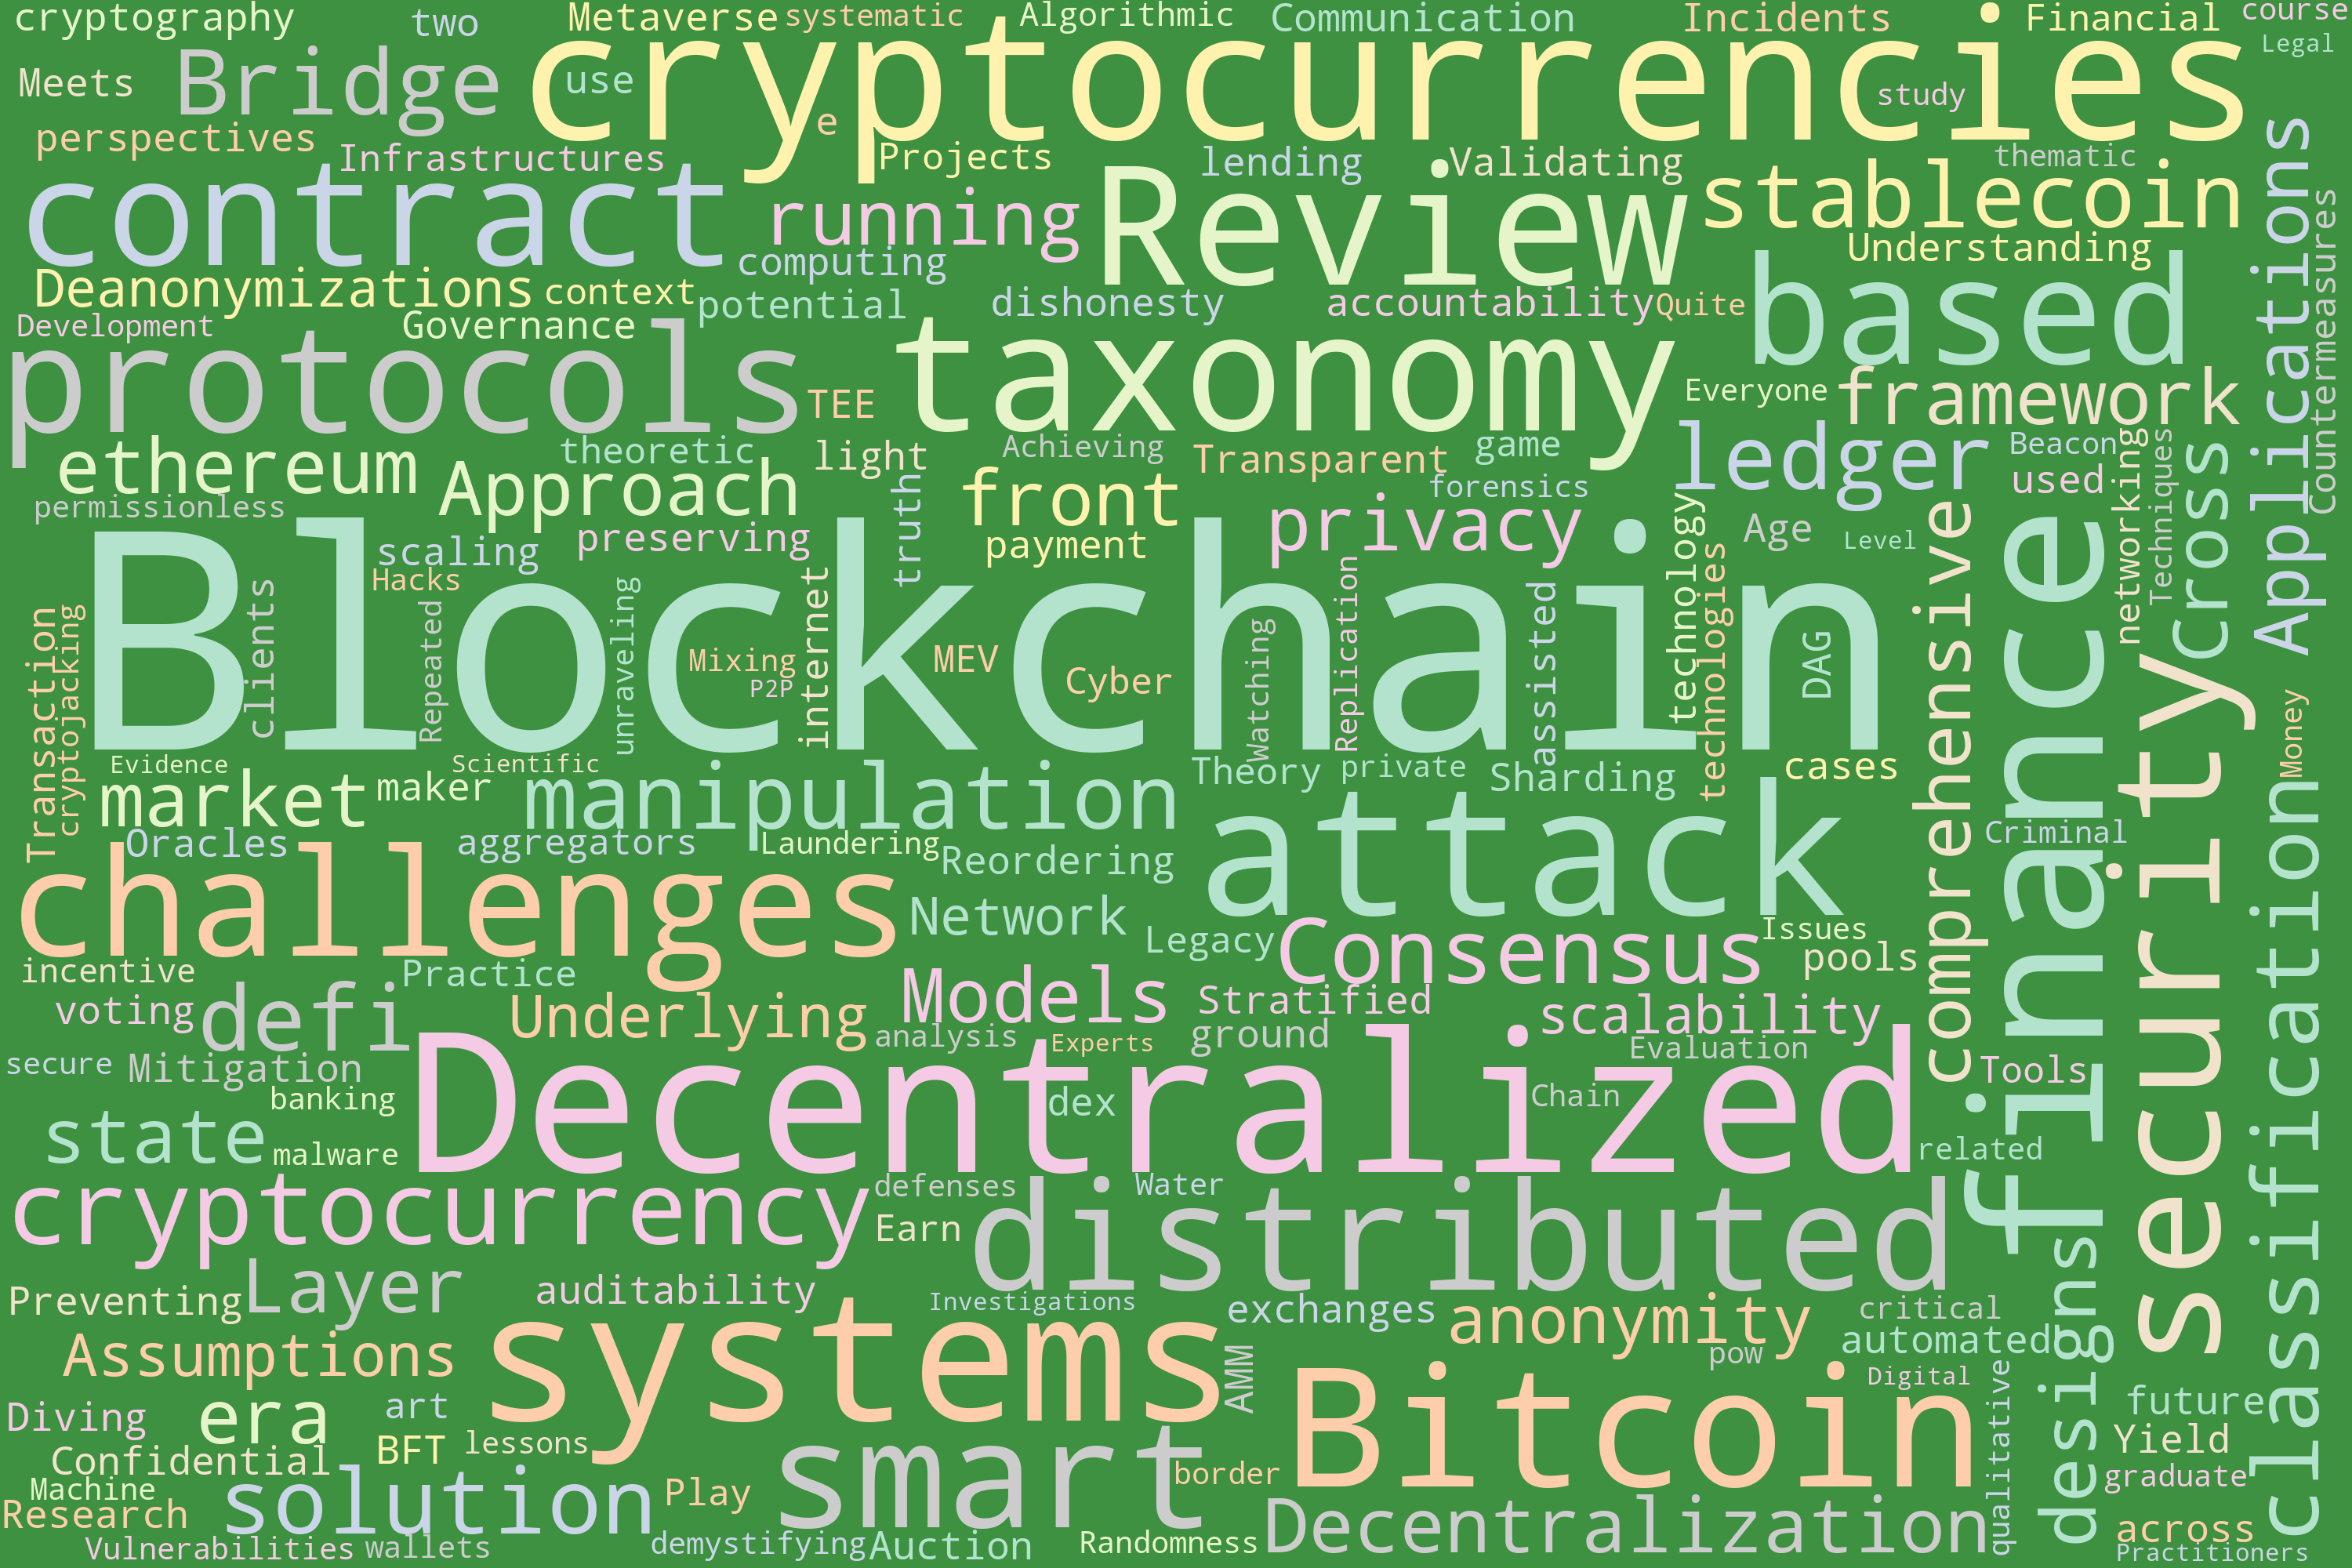

In [24]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# show the word cloud
wordcloud.to_image()

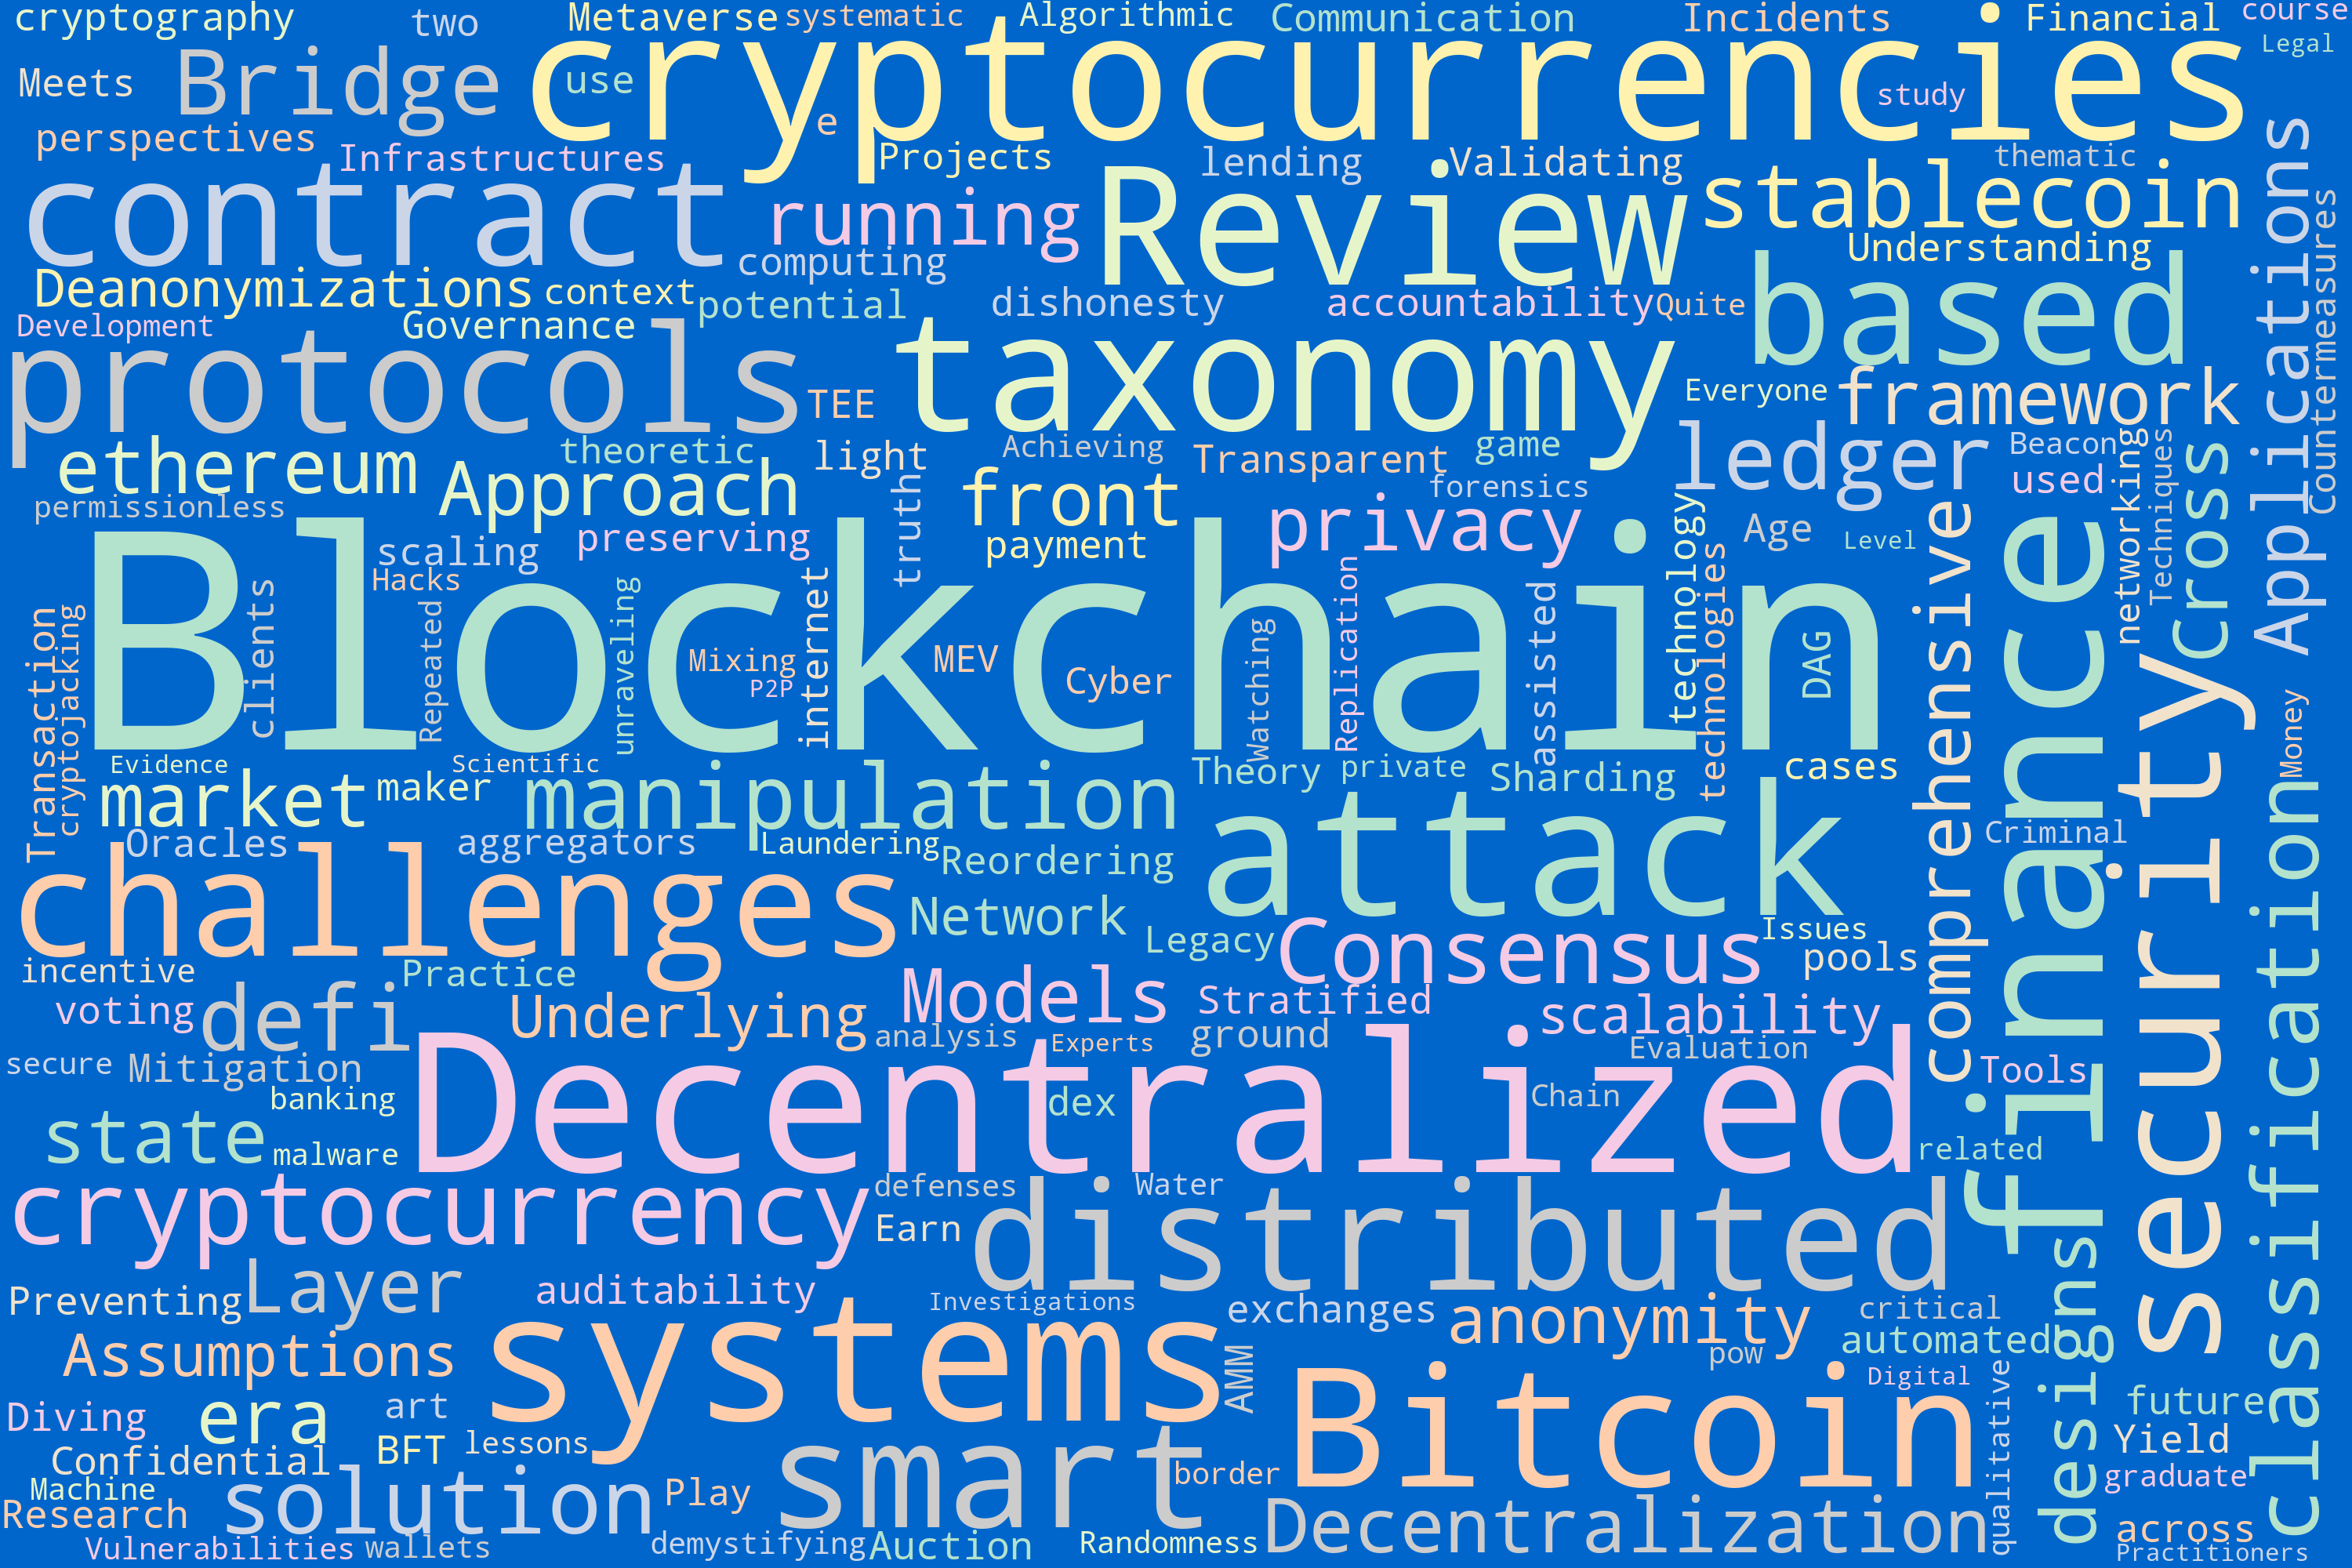

In [25]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# Show the word cloud
wordcloud.to_image()